### Задание: сборка PDF документа
Используя данные по посещаемости библиотек в районах Москвы \
https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json \
постройте круговую диаграмму суммарной посещаемости (NumOfVisitors) 20 наиболее популярных районов Москвы.

Создайте PDF отчет, используя файл \
https://video.ittensive.com/python-advanced/title.pdf \
как первую страницу. На второй странице выведите итоговую диаграмму, самый популярный район Москвы и число посетителей библиотек в нем.

In [115]:
import requests
import json
import pandas as pd

In [116]:
r = requests.get("https://video.ittensive.com/python-advanced/data-7361-2019-11-28.utf.json")
# r.text 
df = pd.DataFrame(json.loads(r.content))
df.isnull().sum()
df.fillna(value=0,inplace=True)

df['district'] = df["ObjectAddress"].apply(lambda x: x[0]['District'])
# df.head()

In [119]:
data = df.groupby(by='district')['NumOfVisitors'].sum().astype('int').sort_values(ascending=False).head(20)
print(f"{data.index[0]} Москвы с самой большой суммарной посещаемостью библиотек: {data[0]} посетителей")
# из решения
# print(f"{data.index.get_values()[0]} Москвы с самой большой суммарной посещаемостью библиотек: {data["NumOfVisitors"].values[0]} посетителей")
# data

Басманный район Москвы с самой большой суммарной посещаемостью библиотек: 765402 посетителей


In [120]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

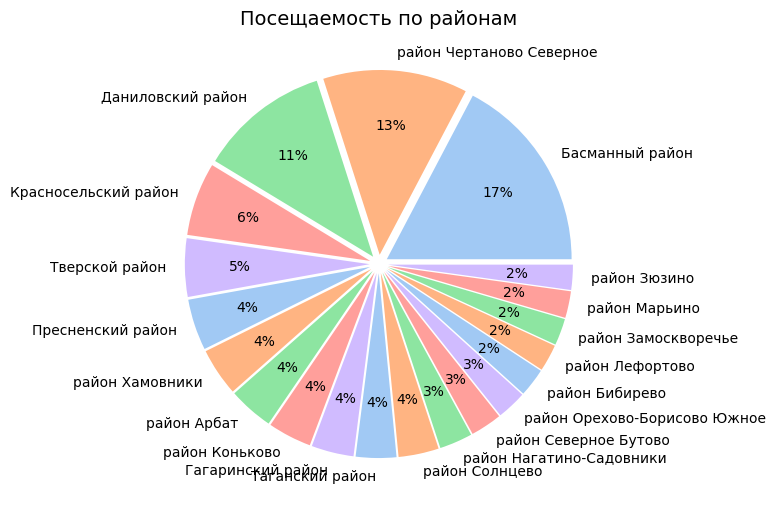

In [121]:
# data.plot.pie(autopct="%.1f%%");
pie, ax = plt.subplots(figsize=[11,6])
colors = sns.color_palette('pastel')[0:5]
labels = data.keys()
plt.pie(x=data, autopct="%.0f%%", colors=colors, labels=labels, pctdistance=.7, explode=[0.05]*len(labels))  
plt.title("Посещаемость по районам", fontsize=14);
# plt.legend(data.index,
#           bbox_to_anchor=(2,1,0.1,0))
pie.savefig("ReadersByDistrict.png")

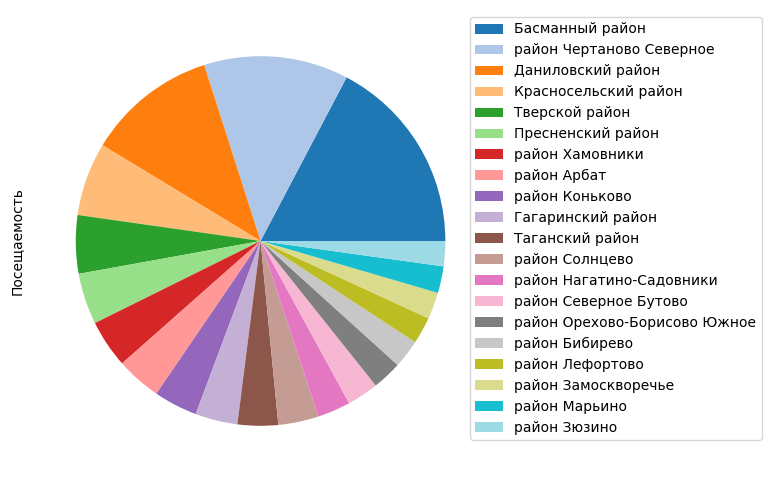

In [122]:
# вариант из решения (для справки)
fig = plt.figure(figsize=(11,6))
area = fig.add_subplot(1, 1, 1)
data[0:20].plot.pie(ax = area, labels=[""]*20, label="Посещаемость", cmap="tab20")
plt.legend(data[0:20].index,
          bbox_to_anchor=(1.5,1,0.1,0))
# plt.title("Посещаемость по районам", fontsize=14);
plt.show()

In [123]:
from reportlab.pdfgen import canvas
from reportlab.lib import pagesizes
from reportlab.pdfbase import pdfmetrics
from reportlab.pdfbase.ttfonts import TTFont
from reportlab.lib.utils import ImageReader

In [124]:
from PyPDF2 import PdfFileMerger, PdfFileReader
from PIL import Image

In [125]:
with open("./title.pdf", "rb") as pdf_file:
    pdf_reader = PdfFileReader(pdf_file)
    print("Число страниц", pdf_reader.getNumPages())
    print("Metadata", pdf_reader.documentInfo)
    print("File Author", pdf_reader.documentInfo["/Author"])
    print("File Creator", pdf_reader.documentInfo["/Creator"])

Число страниц 1
Metadata {'/Author': 'anonymous', '/CreationDate': "D:20191129134603-03'00'", '/Creator': 'ReportLab PDF Library - www.reportlab.com', '/Keywords': '', '/ModDate': "D:20191129134603-03'00'", '/Producer': 'ReportLab PDF Library - www.reportlab.com', '/Subject': 'unspecified', '/Title': 'untitled', '/Trapped': '/False'}
File Author anonymous
File Creator ReportLab PDF Library - www.reportlab.com


In [127]:
# NumOfVisitors
pdfmetrics.registerFont(TTFont('Trebuchet', 'C:/Users/Sovtsov/Documents/ITtensive/Practicum/Trebuchet.ttf'))
PDF = canvas.Canvas("NumOfVisitors.pdf", pagesize=pagesizes.A4)
# print (PDF.getAvailableFonts())
PDF.setFont("Trebuchet", 48)
PDF.drawString(70, 650, "Библиотеки Москвы")
PDF.setFont("Trebuchet", 24)
PDF.drawString(240, 600, '20 районов')
PDF.drawString(100, 550, 'с наибольшим посещением библиотек')
PDF.setFont("Trebuchet", 20)
PDF.drawString(50, 150, 'Самый "читающий" район Москвы')
PDF.setFont("Trebuchet", 16)
PDF.drawString(100, 120, data.index[0])
PDF.drawString(100, 90, "число посетителей библиотек в нем: "+ str(data[0]))

PDF.drawString(550, 820, "2")
w,h = PDF.drawImage(ImageReader("ReadersByDistrict.png"), -30, 50, width=640, preserveAspectRatio=True)
print(w,h)
PDF.save()

files = ["title.pdf", "NumOfVisitors.pdf"]
merger = PdfFileMerger()
for filename in files:
    merger.append(PdfFileReader(open(filename, "rb")))
merger.write("report.pdf")

1100 600


In [ ]:
# "C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe"

In [1]:
# Пример использования HTML текста прямо в блокноте 

from IPython.core.display import HTML
html = '''<html>
    <head>
        <title>Заголовок документа</title>
    </head>
    <body>
        <h1 style="background:#666;padding:10px;color:#fff">
            Заголовок текста
        </h1>
        <p>Описание проекта
            <a href="https://www.ittensive.com/">ссылка на сайт</a>
        </p>
        <p>
            <img src="C:/Users/Sovtsov/Documents/ITtensive/Practicum/img/libraries.png" alt="Библиотеки Москвы"/>
        </p>
                <p>
            <img src="C:/Users/Sovtsov/Documents/ITtensive/Practicum/img//ReadersByDistrict.png" alt="Самые читающие районы Москвы"/>
        </p>
        
        <h2>Табличные данные</h2>
        <table>
            <thead>
                <tr>
                    <th>Заголовок таблицы</th><th></th>
                </tr>
            </thead>
            <tbody>
                <tr>
                    <td>Ячейка таблицы</td><td>Данные</td>
                </tr>
            </tbody>
        </table>
    </body>
</html>'''
HTML(html)

Заголовок таблицы,
Ячейка таблицы,Данные


### Задание: геральдические символы Москвы

Сгенерируйте PDF документ из списка флагов и гербов районов Москвы: \
https://video.ittensive.com/python-advanced/data-102743-2019-11-13.utf.csv \
На каждой странице документа выведите название геральдического символа (Name), его описание (Description) и его изображение (Picture).

Для показа изображений используйте адрес
https://op.mos.ru/MEDIA/showFile?id=XXX \
где XXX - это значение поля Picture в наборе данных. Например: \
https://op.mos.ru/MEDIA/showFile?id=8466da35-6801-41a9-a71e-04b60408accb

В случае возникновения проблем с загрузкой изображений с op.mos.ru можно добавить в код настройку для форсирования использования дополнительных видов шифрования в протоколе SSL/TLS. \
requests.packages.urllib3.util.ssl_.DEFAULT_CIPHERS = 'ALL:@SECLEVEL=1'

In [177]:
import pandas as pd
df = pd.read_csv('https://video.ittensive.com/python-advanced/data-102743-2019-11-13.utf.csv', sep=';')
df = df.loc[:,['Name','Type','Picture','Description','Semantics']]#.sort_values('Name')
# df
# df.Type.unique()

len(df.index)

,ID,Name,Type,Picture,Description,Semantics,global_id,Unnamed: 7
0,1,Герб муниципального округа Новокосино в городе...,Герб,4b29170f-c81c-4418-9669-50bb4f419878,В четырежды рассечённом пурпурном и серебряном...,"Новокосино - уютный уголок столицы, примыкающи...",881376735,NaN
1,2,Флаг муниципального округа Новокосино в городе...,Флаг,3aaf306c-3d1e-40f8-9388-838c8f3ed923,Прямоугольное двухстороннее полотнище с отноше...,"Новокосино - уютный уголок столицы, примыкающи...",881376867,NaN
2,3,Герб муниципального округа Нагатино-Садовники ...,Герб,8e8a775e-bb48-4606-a4b1-769ae45efc87,В зелёном поле на чёрной земле - золотая яблон...,"Зелёный цвет щита символизирует заливные луга,...",881376945,NaN
3,4,Флаг муниципального округа Нагатино-Садовники ...,Флаг,95d4ead4-d9e8-4de4-8d86-03dd0214d4d9,Прямоугольное двухстороннее полотнище зелёного...,"Зелёный цвет щита символизирует заливные луга,...",881384742,NaN
4,5,Герб муниципального округа Марфино в городе Мо...,Герб,4e0b7f34-f186-40e6-a731-dbc1ade83025,Зелёное и лазоревое поле разделено фигурной пе...,"Лист березы совместно с отрезками нитей, вылож...",881396305,NaN
5,6,Флаг муниципального округа Марфино в городе Мо...,Флаг,928dc8c1-7f96-4786-b6ac-00c8c2a2b4ff,Прямоугольное двухстороннее полотнище с отноше...,"Лист березы совместно с отрезками нитей, вылож...",881397411,NaN
6,7,Герб муниципального округа Ломоносовский в гор...,Герб,0e3750e0-38cb-4e97-8327-0279ba20bea2,В золотом щите - пониженный червленый пояс и п...,Символика герба Ломоносовского муниципального ...,881397550,NaN
7,8,Флаг муниципального округа Ломоносовский в гор...,Флаг,5ed397ea-2dbc-49da-b8d9-86076a30aa7e,Прямоугольное двухстороннее полотнище желтого ...,Символика флага Ломоносовского муниципального ...,881401300,NaN
8,9,Герб муниципального округа Косино-Ухтомский в ...,Герб,2dbd4351-7747-4313-b687-828f27e77c76,"В лазоревом и серебряном поле, пересеченном в ...",Косино - одно из древнейших сел Подмосковья. З...,881402107,NaN
9,10,Флаг муниципального округа Косино-Ухтомский в ...,Флаг,87a4c66e-88bc-4d62-ac8c-86897e879a05,Прямоугольное двухстороннее полотнище с отноше...,Косино - одно из древнейших сел Подмосковья. З...,881402721,NaN


In [172]:
'''<html>
<head><meta charset="utf-8"/>
    <title>Геральдические символы Москвы</title>
    <style> h2 {page-break-before:always} </style>
</head>
<body>
     <h1>{Name}</h1>
	 <table>
	   <tr>
	   <td><img src="https://op.mos.ru/MEDIA/showFile?id={Picture}" alt="{Name}"/></td>
	   <td><p>{Description}</td>
	   </tr>
	 </table>
	 <br/>
     <p>{Semantics}</a></p>
    ...
</body>
</html>'''

h_hdr = '<html><head><meta charset="utf-8"/><title>Геральдические символы Москвы</title><style> h1 {page-break-before:always} </style></head><body>'
h_ftr = '</body></html>'

with open('msk-her.html', 'w', encoding='utf-8') as h:
    h.write(h_hdr)
    for index, row in df.iterrows():
        Name = row["Name"]
        h.write(f'<h1>{Name}</h1><table><tr>')        
        h.write(f'<td width="50%"><img style="margin-left:10%" src="https://op.mos.ru/MEDIA/showFile?id={row["Picture"]}" alt="{Name}"/></td>')        
        h.write(f'<td><p>{row["Description"]}</td></tr></table>')
        h.write(f'<br/><p style="font-size:150%">{row["Semantics"]}</a></p>')
    h.write(h_ftr)

import pdfkit
config = pdfkit.configuration(wkhtmltopdf="C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe")
options = {
    'page-size': 'A4',
    'margin-top': '0.5in',
    'margin-right': '0.5in',
    'margin-left': '0.5in',
    'margin-bottom': '0.5in',
    'encoding': 'utf-8',
    'footer-html': 'footer.html',
    'header-font-name': 'Trebuchet MS',
    'footer-font-name': 'Trebuchet MS',
    'header-right': '[page]',
    'enable-local-file-access': '',
    'page-offset': 1
}

pdfkit.from_file("msk-her.html", 'msk-heraldics.pdf', # verbose=True,
                 configuration=config, options=options)


### Задание: многостраничный отчет
Используя данные по активностям в парках Москвы \
https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json 

Создайте PDF отчет, в котором выведите:
1. Диаграмму распределения числа активностей по паркам, топ10 самых активных
2. Таблицу активностей по всем паркам в виде Активность-Расписание-Парк

In [108]:
import requests
import pandas as pd
import json

In [109]:
r = requests.get("https://video.ittensive.com/python-advanced/data-107235-2019-12-02.utf.json")
# print(json.loads(r.content))
df = pd.DataFrame(json.loads(r.content)).fillna(value=0) #,columns=["NumOfVisitors", "CommonName"]).fillna(value=0)
df['Name'] = df["NameOfPark"].apply(lambda x: x['value'])
# df.head()
# print(data.shape)

byname = df.groupby('Name', as_index=True)['ID'].count().sort_values(ascending=False)
byname = byname.head(10)


In [110]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

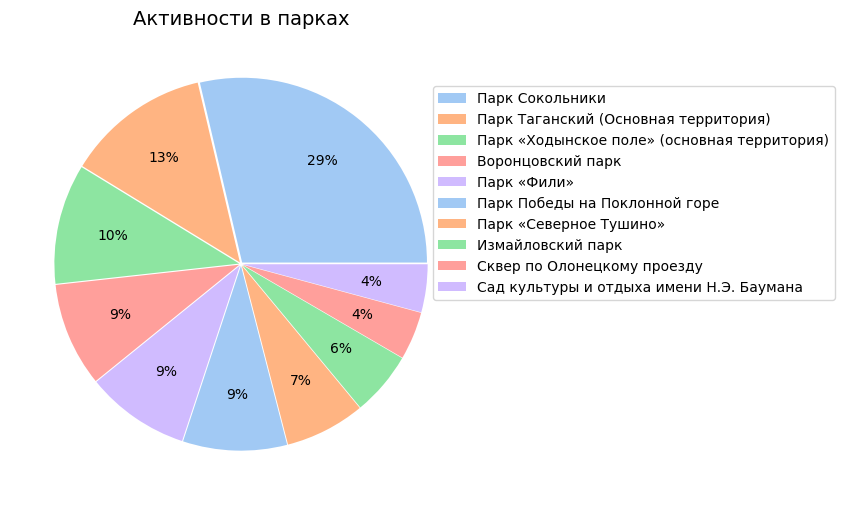

In [111]:
# data.plot.pie(autopct="%.1f%%");
pie, ax = plt.subplots(figsize=[11,6])
colors = sns.color_palette('pastel')[0:5]
labels = ['']*len(byname.index) #byname.keys() 
plt.pie(x=byname,  autopct="%.0f%%", colors=colors, labels=labels, #center=(-2,0),
        pctdistance=.7, explode=[0.01]*len(labels))  
plt.title("Активности в парках", fontsize=14);
# data[0:20].plot.pie(labels=[""]*20, label="Доли", cmap="tab20")
plt.legend(byname.index, 
           bbox_to_anchor=(.9,1,0.1,-.1))
pie.savefig("ParkActivitiesShares.png", bbox_inches='tight')

интересный прием:

        from io import BytesIO
        ...
        img = BytesIO()
        plt.savefig(img)
        img = 'data:image/png;base64,' + binascii.b2a_base64(img.getvalue(),
                                            newline=False).decode("UTF-8")


In [121]:
data = df.loc[:,['CourseName','Name','CoursesTimetable','CoursesDescription']] 
data.columns = ['Мероприятие','Парк','Расписание','Описание']
# data.set_index('Парк', inplace=True)
data.head()

,Мероприятие,Парк,Расписание,Описание
0,Английский язык для детей,Сад культуры и отдыха имени Н.Э. Баумана,"Воскресенье, 16:00–17:00, 17:00–18:00",В непринужденной игровой обстановке участники ...
1,Киноклуб на английском языке,Сад культуры и отдыха имени Н.Э. Баумана,"Пятница, 20:30–22:00",Для гостей сада от 16 лет проходят встречи язы...
2,Цигун на открытом воздухе,Сад культуры и отдыха имени Н.Э. Баумана,"Воскресенье, 14:00–16:00",Занятия проходят по методу фалунь дафа — совер...
3,Мастер-классы по парным танцам на льду,Сад культуры и отдыха имени Н.Э. Баумана,"Суббота, 17:00–18:00",На катке в саду имени Баумана будут организова...
4,Мастерские театрального художника,Сад культуры и отдыха имени Н.Э. Баумана,"Вторник, 15:00–16:00, с декабря",На встречах с детским театром «Домик Фанни Бэл...


In [113]:
import binascii
import pdfkit
from jinja2 import Template

In [122]:
# !pip install pretty-html-table

import pretty_html_table

html_template = '''<html>
<head>
    <title>Мероприятия в парках Москвы</title>
    <meta charset="utf-8"/>
</head>
<body>
    <h1>Доля активностей по паркам</h1>
    <img src="{{data.image}}"  alt="Распределение посетителей">
    <h2>Расписание мероприятий в парках</h2>
    {{data.table}}
</body>
</html>'''

html = Template(html_template).render(data = {
    'image': img,
    'table': pretty_html_table.build_table(data, 'blue_light')
})
# with open('html2.html', 'w', encoding='utf-8') as h:
#     h.write(html)

In [124]:
config = pdfkit.configuration(wkhtmltopdf='C:/Program Files/wkhtmltopdf/bin/wkhtmltopdf.exe')
options = {
    'page-size': 'A4',
    'header-right': '[page]'
}
pdfkit.from_string(html, 'Moscow Activities 2019.pdf',
                  configuration=config, options = options)

True

In [125]:
print(f"Мероприятий по Тайцзицюань: {df[df.CourseName.str.contains('Тайцзицюань')].shape[0]}")

Мероприятий по Тайцзицюань: 1


### Отправка email и интеграция

Практические задания находятся в отдельном блокноте